In [ ]:
from pyspark import SparkContext 
sc = SparkContext.getOrCreate()

###  Distribution of Property Type

In [ ]:
property_type=[(u'SF', 741), (u'PU', 705), (u'CO', 684), (u'CP', 371), (u'MH', 259)]

In [93]:
x= [i[0] for i in property_type]

In [95]:
x

['SF', 'PU', 'CO', 'CP', 'MH']

In [174]:
y= [i[1] for i in property_type]

In [175]:
y

[741, 705, 684, 371, 259]

In [122]:
sc.stop()

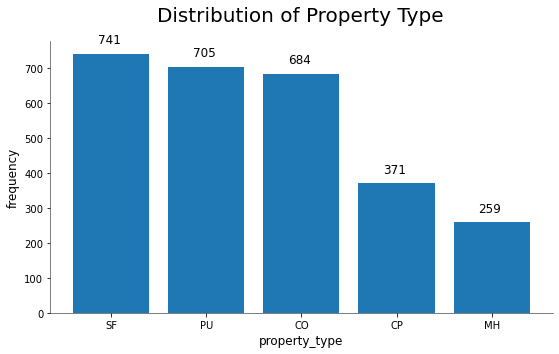

In [221]:
import matplotlib.pyplot as plt 
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(9,5))
ax.bar(x,y)  
ax.set_xlabel('property_type',fontsize=12)
ax.set_ylabel('frequency',fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.text(3.5,850,'Distribution of Property Type',horizontalalignment='right', verticalalignment='center',fontsize='20',color='black',style='normal')
for i,value in enumerate(y):
    ax.text(i+0.1,value+40,value,horizontalalignment='right', verticalalignment='center',fontsize='12',color='black',style='normal')
plt.show()

### Average UPB of Property Type

In [222]:
propery_upb=[(u'SF', 376734.14304993255), (u'PU', 374615.60283687944), (u'CO', 364201.7543859649), (u'CP', 228156.33423180593), (u'MH', 158474.90347490346)]

In [104]:
x1= [i[0] for i in propery_upb]

In [106]:
x1

['SF', 'PU', 'CO', 'CP', 'MH']

In [108]:
y1= [int(i[1]) for i in propery_upb]

In [109]:
y1

[376734, 374615, 364201, 228156, 158474]

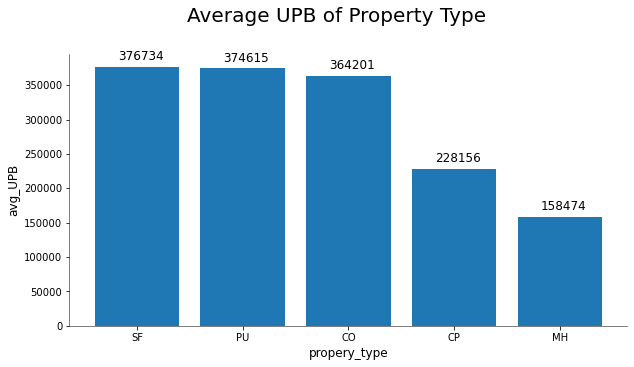

In [220]:
import matplotlib.pyplot as plt 
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,5))
bars=ax.bar(x1,y1)  
ax.set_xlabel('propery_type',fontsize=12)
ax.set_ylabel('avg_UPB',fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(.5)
ax.spines['bottom'].set_linewidth(.5)
ax.text(3.3,450000,'Average UPB of Property Type',horizontalalignment='right', verticalalignment='center',fontsize='20',color='black',style='normal')

for i,value in enumerate(y1):
    ax.text(i+0.25,value+15000,value,horizontalalignment='right', verticalalignment='center',fontsize='12',color='black',style='normal')
plt.show()

### Distribution of Original Loan Term

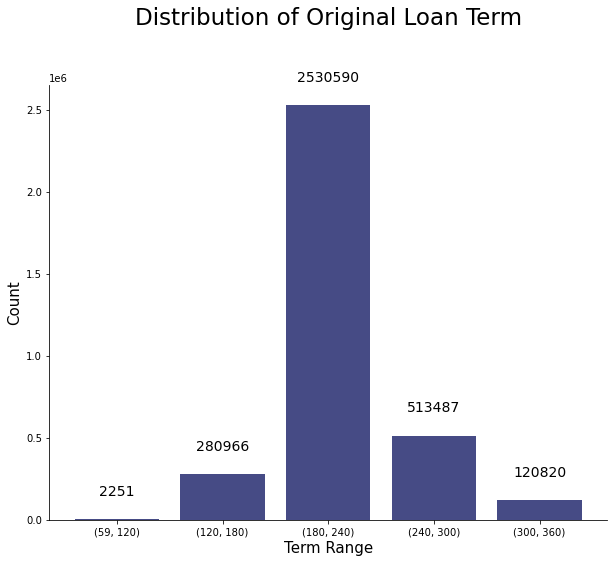

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict 

term_count = [('115', 5), ('296', 6), ('325', 6), ('145', 8), ('332', 8), ('151', 10), ('320', 12), ('292', 14), ('330', 15), ('234', 19), ('152', 19), ('335', 23), ('173', 26), ('313', 27), ('256', 28), ('172', 29), ('119', 30), ('308', 31), ('157', 32), ('337', 32), ('255', 34), ('265', 35), ('231', 37), ('359', 37), ('277', 38), ('323', 41), ('295', 42), ('229', 46), ('167', 46), ('293', 48), ('338', 49), ('301', 50), ('315', 53), ('281', 55), ('298', 62), ('289', 63), ('72', 66), ('322', 68), ('170', 68), ('239', 69), ('331', 72), ('327', 81), ('286', 85), ('131', 92), ('329', 92), ('306', 99), ('305', 100), ('273', 102), ('339', 113), ('258', 134), ('321', 135), ('162', 137), ('334', 142), ('333', 142), ('314', 149), ('175', 157), ('310', 168), ('161', 174), ('178', 175), ('171', 177), ('294', 178), ('299', 183), ('108', 184), ('317', 185), ('302', 193), ('326', 200), ('297', 203), ('316', 234), ('204', 237), ('179', 244), ('241', 254), ('341', 284), ('340', 306), ('177', 309), ('342', 324), ('176', 325), ('264', 357), ('84', 362), ('60', 372), ('343', 381), ('174', 385), ('216', 397), ('345', 401), ('132', 419), ('344', 505), ('346', 590), ('252', 672), ('358', 693), ('121', 741), ('228', 830), ('357', 878), ('96', 1232), ('324', 1388), ('347', 1647), ('356', 1708), ('276', 1738), ('288', 1867), ('168', 1984), ('156', 2033), ('144', 2106), ('349', 2147), ('192', 2682), ('336', 3133), ('350', 3156), ('312', 3262), ('355', 3391), ('348', 4054), ('354', 4167), ('353', 4654), ('351', 4730), ('352', 5065), ('300', 71399), ('120', 271270), ('240', 507289), ('180', 2526273), ('360', 13556547)]

distinct_term = [int(pair[0]) for pair in term_count]
cats, bins = pd.cut(distinct_term, 5, retbins=True)
term_ranges = [range(int(bins[n]), int(bins[n+1])) for n, bin in enumerate(bins[:-1])]

term_count_dict = dict()

for range in term_ranges:
    term_count_dict[range] = 0

for pair in term_count:
    for range in term_ranges:
        if int(pair[0]) in range:
            term_count_dict[range] += int(pair[1])

fig, ax = plt.subplots(figsize=(10,8))  # make one subplot (ax) on the figure
bars = ax.bar([str(i).strip('range') for i in term_count_dict.keys()], term_count_dict.values(), color='#464b85')
ax.set_ylim(0, 2653191)
ax.set_xlabel("Term Range", fontsize=15)
ax.set_ylabel("Count", fontsize=15)
ax.set_title("Distribution of Original Loan Term", fontsize=23, loc='center', pad=60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for rect in bars:
    height = rect.get_height()
    text_loc = rect.get_height()+125000
    plt.text(rect.get_x() + rect.get_width()/2.0, text_loc, '%d' % int(height), ha='center', va='bottom', fontsize=14)
    
plt.show()